In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/labeled_data.csv')

In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


#Data Preprocessing


In [5]:
data.shape

(24783, 7)

In [6]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Length: 24783, dtype: bool

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

##Text Preprocessing

In [9]:
import re
import string

In [10]:
data["tweet"].head(5)

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object

###convert uppercase to lowercase

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head(5)

0    !!! rt @mayasolovely: as a woman you shouldn't...
1    !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3    !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4    !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
Name: tweet, dtype: object

##Checking whether have links or not

In [13]:
data["tweet"].iloc[23815]


'faggots http://t.co/dmkbghai1z'

In [14]:
data["tweet"].iloc[23810:23819]


23810    everyone thinks of you as a hoe so idk why you...
23811               eww i hate how bitches dress sometimes
23812    f u tumblr bc my blog is black &amp; white but...
23813                        faggot http://t.co/tkpokv3ncd
23814         faggot time he circled the block for 3 hours
23815                       faggots http://t.co/dmkbghai1z
23816                                        fags god damn
23817                       fat bitches fat bitches heeeey
23818                      fat dykes make me want to vomit
Name: tweet, dtype: object

##remove links

In [15]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [16]:
data["tweet"].iloc[23810:23819]

23810    everyone thinks of you as a hoe so idk why you...
23811               eww i hate how bitches dress sometimes
23812    f u tumblr bc my blog is black &amp; white but...
23813                                              faggot 
23814         faggot time he circled the block for 3 hours
23815                                             faggots 
23816                                        fags god damn
23817                       fat bitches fat bitches heeeey
23818                      fat dykes make me want to vomit
Name: tweet, dtype: object

##Remove punctuations

In [17]:
data["tweet"].head(5)

0    !!! rt @mayasolovely: as a woman you shouldn't...
1    !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3    !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4    !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
Name: tweet, dtype: object

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [20]:
data["tweet"].head(5)

0     rt mayasolovely as a woman you shouldnt compl...
1     rt mleew17 boy dats coldtyga dwn bad for cuff...
2     rt urkindofbrand dawg rt 80sbaby4life you eve...
3       rt cganderson vivabased she look like a tranny
4     rt shenikaroberts the shit you hear about me ...
Name: tweet, dtype: object

##remove numbers

In [21]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [22]:
data["tweet"].head(5)

0     rt mayasolovely as a woman you shouldnt compl...
1     rt mleew boy dats coldtyga dwn bad for cuffin...
2     rt urkindofbrand dawg rt sbabylife you ever f...
3       rt cganderson vivabased she look like a tranny
4     rt shenikaroberts the shit you hear about me ...
Name: tweet, dtype: object

##download stopwords to remove stopwords

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines() 

In [27]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [29]:
data["tweet"].head(5)

0    rt mayasolovely woman shouldnt complain cleani...
1    rt mleew boy dats coldtyga dwn bad cuffin dat ...
2    rt urkindofbrand dawg rt sbabylife ever fuck b...
3             rt cganderson vivabased look like tranny
4    rt shenikaroberts shit hear might true might f...
Name: tweet, dtype: object

##Stemming

In [30]:
data["tweet"].tail(5)

24778    yous muthafin lie lifeasking pearls coreyemanu...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, dtype: object

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data["tweet"].tail(5)

24778    you muthafin lie lifeask pearl coreyemanuel ri...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: tweet, dtype: object

In [34]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean hou...
1,1,3,0,3,0,1,rt mleew boy dat coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt sbabylif ever fuck bi...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might fa...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you muthafin lie lifeask pearl coreyemanuel ri...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


##Building Vacabulary

In [35]:
from collections import Counter
vocab = Counter()

In [36]:
vocab

Counter()

In [37]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [38]:
vocab

Counter({'bitch': 11332,
         'rt': 7618,
         'hoe': 4287,
         'like': 2854,
         'fuck': 2251,
         'pussi': 2217,
         'im': 2090,
         'nigga': 1990,
         'dont': 1784,
         'get': 1777,
         'ass': 1587,
         'got': 1301,
         'shit': 1290,
         'u': 1282,
         'aint': 1169,
         'trash': 1152,
         'lol': 1067,
         'go': 902,
         'know': 880,
         'amp': 845,
         'love': 771,
         'look': 763,
         'want': 752,
         'one': 750,
         'make': 708,
         'girl': 695,
         'say': 683,
         'cant': 670,
         'yall': 667,
         'call': 625,
         'that': 624,
         'yo': 615,
         'talk': 596,
         'bird': 588,
         'your': 575,
         'bad': 569,
         'man': 565,
         'think': 557,
         'need': 544,
         'faggot': 538,
         'hate': 536,
         'good': 533,
         'see': 511,
         'time': 495,
         'ya': 478,
         

In [39]:
len(vocab)

28790

In [40]:
data.shape

(24783, 7)

In [41]:
tokens = [key for key in vocab if vocab[key] > 12]

In [74]:
tokens

['rt',
 'woman',
 'shouldnt',
 'complain',
 'clean',
 'hous',
 'amp',
 'man',
 'alway',
 'take',
 'trash',
 'boy',
 'dat',
 'bad',
 'hoe',
 'st',
 'place',
 'dawg',
 'sbabylif',
 'ever',
 'fuck',
 'bitch',
 'start',
 'cri',
 'confus',
 'shit',
 'look',
 'like',
 'tranni',
 'hear',
 'might',
 'true',
 'told',
 'ya',
 'blow',
 'faith',
 'somebodi',
 'still',
 'sit',
 'hate',
 'anoth',
 'got',
 'much',
 'go',
 'caus',
 'im',
 'tire',
 'big',
 'come',
 'us',
 'skinni',
 'girl',
 'get',
 'back',
 'that',
 'includ',
 'fight',
 'curv',
 'everyon',
 'lol',
 'walk',
 'convers',
 'smh',
 'gang',
 'land',
 'smoke',
 'loser',
 'yea',
 'ig',
 'thing',
 'nigga',
 'miss',
 'whatev',
 'love',
 'cut',
 'everyday',
 'b',
 'black',
 'bottl',
 'broke',
 'cant',
 'tell',
 'noth',
 'see',
 'wont',
 'chang',
 'dont',
 'even',
 'suck',
 'dick',
 'video',
 'bout',
 'tip',
 'toe',
 'floor',
 'pussi',
 'lip',
 'heaven',
 'door',
 'hit',
 'met',
 'gave',
 'pill',
 'need',
 'spend',
 'money',
 'want',
 'busi',
 'o

In [42]:
len(tokens)

1874

In [43]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

##Divide dataset

In [44]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean hou...
1,1,3,0,3,0,1,rt mleew boy dat coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt sbabylif ever fuck bi...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might fa...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you muthafin lie lifeask pearl coreyemanuel ri...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [45]:
X = data['tweet']
Y = data['class']

In [46]:
X

0        rt mayasolov woman shouldnt complain clean hou...
1        rt mleew boy dat coldtyga dwn bad cuffin dat h...
2        rt urkindofbrand dawg rt sbabylif ever fuck bi...
3                   rt cganderson vivabas look like tranni
4        rt shenikarobert shit hear might true might fa...
                               ...                        
24778    you muthafin lie lifeask pearl coreyemanuel ri...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: tweet, Length: 24783, dtype: object

In [47]:
Y

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64

In [48]:
!pip install scikit-learn

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
X_train.shape

(19826,)

In [51]:
X_test.shape

(4957,)

In [52]:
Y_train.shape

(19826,)

In [53]:
Y_test.shape

(4957,)

In [54]:
X_train

13816          phil hugh look like phil hugh old yanke mlb
1164                       cakemamaa yall hoe messi god nb
16453    rt mikediggem badgaltitii see girl wit nigga l...
10706        love faggot absolut love especi one dress tea
18390    rt jazsi bitch tweet nigga say dont mess he li...
                               ...                        
20570                           rusti hoe bumpin needdanam
6774                   nikkiconn bellabelcastro trippi hoe
18702    rt bugattibeez pussi still tast like mcdonald ...
3503                     impactparasit fuckin roast faggot
21294         teach rt intellectsru realli fuck bitch brah
Name: tweet, Length: 19826, dtype: object

In [55]:
X_test

10967    think yall lose yall nigga cuz season chang ya...
12594    lol bitch ass boy tell respond peer pressur va...
12738                          man bitch beauti helen troy
13341    nigga get fuck weekend get fuck daili bitch st...
18938    rt dxpperjay asshol know refer girl bitch does...
                               ...                        
7336               xkasiaaa lmao bitch know stand everyday
11340    im particularli shi hard break ice stranger ot...
13668                     faggot pussi put twitter pic dog
9887                     hood nigga bitch love emoji lmfao
6001     garrettwink bitch shut yo littl ass fuck color...
Name: tweet, Length: 4957, dtype: object

In [56]:
Y_train

13816    2
1164     1
16453    1
10706    1
18390    1
        ..
20570    1
6774     1
18702    1
3503     0
21294    1
Name: class, Length: 19826, dtype: int64

In [57]:
Y_test

10967    1
12594    1
12738    1
13341    1
18938    0
        ..
7336     1
11340    1
13668    1
9887     0
6001     1
Name: class, Length: 4957, dtype: int64

##Vectorization

In [58]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [59]:
vectorized_x_train = vectorizer(X_train, tokens)

In [60]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
vectorized_x_test = vectorizer(X_test, tokens)

In [62]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
Y_test

10967    1
12594    1
12738    1
13341    1
18938    0
        ..
7336     1
11340    1
13668    1
9887     0
6001     1
Name: class, Length: 4957, dtype: int64

In [64]:
Y_train.value_counts()

class
1    15337
2     3334
0     1155
Name: count, dtype: int64

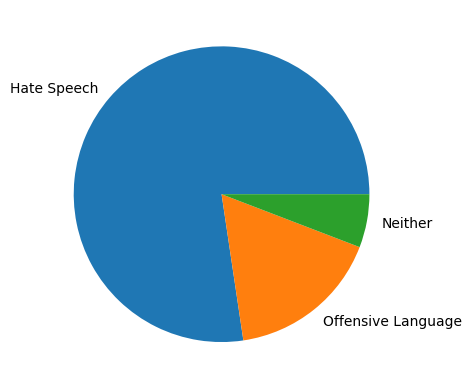

In [65]:
plt.pie(np.array([Y_train.value_counts()[1], Y_train.value_counts()[2],Y_train.value_counts()[0]]), labels=['Hate Speech', 'Offensive Language','Neither'])
plt.show()

##Handle imbalanced dataset

In [66]:
!pip install imbalanced-learn

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, Y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(46011, 1874) (46011,)


In [68]:
y_train_smote.value_counts()

class
2    15337
1    15337
0    15337
Name: count, dtype: int64

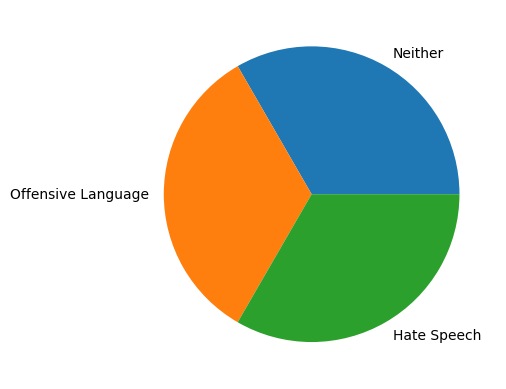

In [69]:
plt.pie(np.array([y_train_smote.value_counts()[2], y_train_smote.value_counts()[1],y_train_smote.value_counts()[0]]), labels=['Neither', 'Offensive Language','Hate Speech'])
plt.show()

In [71]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27404308, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [72]:
y_train_smote

0        2
1        1
2        1
3        1
4        1
        ..
46006    2
46007    2
46008    2
46009    2
46010    2
Name: class, Length: 46011, dtype: int64

In [73]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
Y_test

10967    1
12594    1
12738    1
13341    1
18938    0
        ..
7336     1
11340    1
13668    1
9887     0
6001     1
Name: class, Length: 4957, dtype: int64

##Model Training and Evaluation

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# def training_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred), 3)
#     rec = round(recall_score(y_act, y_pred), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
# def validation_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred), 3)
#     rec = round(recall_score(y_act, y_pred), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Choose the appropriate average parameter
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)

    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)

    print(f"Validation Scores:\n\t Accuracy = {acc},\n\t Precision = {pr},\n\t Recall = {rec},\n\t F1-Score = {f1}")

##Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [79]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(max_iter=15352)  
# lr.fit(vectorized_x_train_smote, y_train_smote)

In [85]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [86]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.918
	Precision = 0.918
	Recall = 0.918
	F1-Score = 0.917


In [87]:
y_test_pred = lr.predict(vectorized_x_test)

In [88]:
validation_scores(Y_test, y_test_pred)

Validation Scores:
	 Accuracy = 0.847,
	 Precision = 0.896,
	 Recall = 0.847,
	 F1-Score = 0.865


##Naive Bayes

In [89]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.865
	Precision = 0.866
	Recall = 0.865
	F1-Score = 0.865
Validation Scores:
	 Accuracy = 0.836,
	 Precision = 0.893,
	 Recall = 0.836,
	 F1-Score = 0.858


##Decision Tree

In [90]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.997
	Precision = 0.997
	Recall = 0.997
	F1-Score = 0.997
Validation Scores:
	 Accuracy = 0.867,
	 Precision = 0.872,
	 Recall = 0.867,
	 F1-Score = 0.87


##Random Forest

In [91]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.997
	Precision = 0.997
	Recall = 0.997
	F1-Score = 0.997
Validation Scores:
	 Accuracy = 0.888,
	 Precision = 0.884,
	 Recall = 0.888,
	 F1-Score = 0.886


##Support Vector Machine

In [ ]:
# svm = SVC()

# svm.fit(vectorized_x_train_smote, y_train_smote)

# y_train_pred = svm.predict(vectorized_x_train_smote)

# y_test_pred = svm.predict(vectorized_x_test)

# training_scores(y_train_smote, y_train_pred)

# validation_scores(y_test, y_test_pred)

In [92]:
import pickle

with open('../static/model/model_lr.pickle', 'wb') as file:
    pickle.dump(lr, file)

In [93]:
import pickle

with open('../static/model/model_mnb.pickle', 'wb') as file:
    pickle.dump(mnb, file)

In [94]:
import pickle

with open('../static/model/model_dt.pickle', 'wb') as file:
    pickle.dump(dt, file)

In [95]:
import pickle

with open('../static/model/model_rf.pickle', 'wb') as file:
    pickle.dump(rf, file)